In [71]:
import numpy as np
import matplotlib.pyplot as plt

# ASTR 310 Lecture 19a - Fourier Series and Fourier Transforms

### 1. Create a simple function to analyze

* Create an array of $x$ values ranging from 0 to 2 (seconds).  I suggest something like 200 points.
* Create functions $f_1(x) = \sin(2\pi x),$ $f_2(x) = (1/3) \cos(6\pi x),$ and $f(x) = f_1(x) + f_2(x).$
* Plot $f$, $f_1$, and $f_2$ with appropriate axis labels and a legend.

[4 pts]

Text(0, 0.5, 'y')

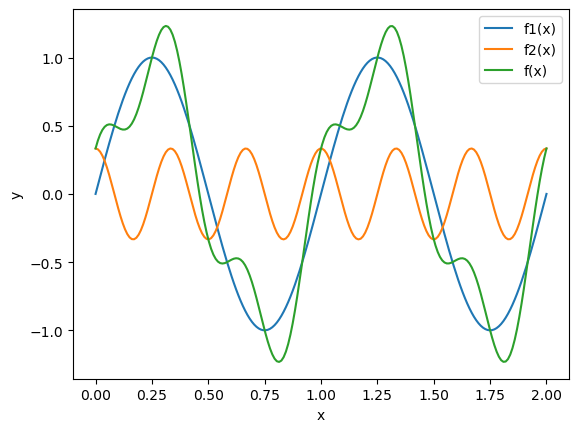

In [72]:
x = np.linspace(0, 2, 200)
f1x = np.sin(2*np.pi*x)
f2x = 1/3 * np.cos(6*np.pi*x)
fx = f1x + f2x

plt.plot(x, f1x, label="f1(x)")
plt.plot(x, f2x, label="f2(x)")
plt.plot(x, fx, label="f(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

### 2. Inspect the FT of the simple function

* Plot the real and imaginary parts of the discrete Fourier transforms of $f$, $f_1$, and $f_2$ (with a legend again).  Be sure to feed `rfftfreq` the correct value for the sample spacing, so the frequencies will come out in units of cycles $s^{-1}$ (a.k.a. Hz).  Limit the x-axis range so that you can focus on the interesting parts of the spectrum.  
You should see a large spike corresponding to each of the two frequency components.  The amplitudes of the spikes are $(N/2)$ times the amplitudes of $f_1$ and $f_2,$ where $N$ is the total number of data points.

* Take the inverse transform of the FT; plot that on top of the original function.  They should match.

[6 pts]

(0.0, 5.0)

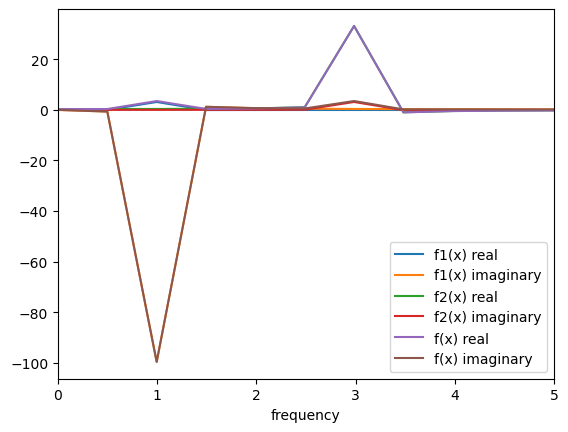

In [73]:
f1hat = np.fft.rfft(f1x)
f2hat = np.fft.rfft(f2x)
fhat = np.fft.rfft(fx)
k = np.fft.rfftfreq(len(x), 2/199)

plt.plot(k, f1hat.real, label="f1(x) real")
plt.plot(k, f1hat.imag, label="f1(x) imaginary")
plt.plot(k, f2hat.real, label="f2(x) real")
plt.plot(k, f2hat.imag, label="f2(x) imaginary")
plt.plot(k, fhat.real, label="f(x) real")
plt.plot(k, fhat.imag, label="f(x) imaginary")
plt.legend()
plt.xlabel("frequency")
plt.xlim(0, 5)

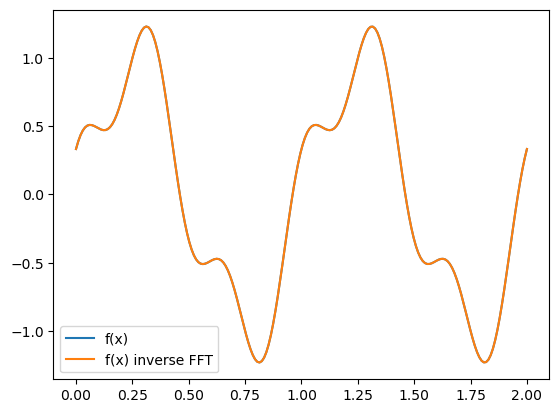

In [74]:
f1x_inv = np.fft.irfft(fhat, len(x))
plt.plot(x, fx, label="f(x)")
plt.plot(x, f1x_inv, label="f(x) inverse FFT")
plt.legend()

### 3. Approximations of a more complicated function

Here we will experiment with making successive approximations to a function using a subset of the terms from its Fourier series.  The more terms we include, the better our approximation will be.

* Read the data from the file `plot-data-interp.csv`.
* Take the FT of those data.
* If you set the high-frequency components of the FT array to have zero amplitude, and then do the inverse FT, that's equivalent to neglecting the higher-order terms in the Fourier series.
Implement that procedure to show how successive terms improve the accuracy of the reconstructed signal.
For example, try reconstructing the original signal using just the first 1, 2, 5, and 20 terms of the Fourier series and plot those approximate reconstructions overlaid on the original.  Don't forget a nice, informative legend.

[10 pts]

In [75]:
import pandas as pd
df = pd.read_csv("plot-data-interp.csv")
df.columns = ['x', 'y']
x = df['x'].to_numpy()
y = df["y"].to_numpy()

In [76]:
yhat = np.fft.rfft(y)
k = np.fft.rfftfreq(len(x), x[1] - x[0])

inv1 = np.fft.irfft(yhat[0:1], len(x))
inv2 = np.fft.irfft(yhat[0:2], len(x))
inv5 = np.fft.irfft(yhat[0:5], len(x))
inv20 = np.fft.irfft(yhat[0:20], len(x))

np.ffit.irfft()

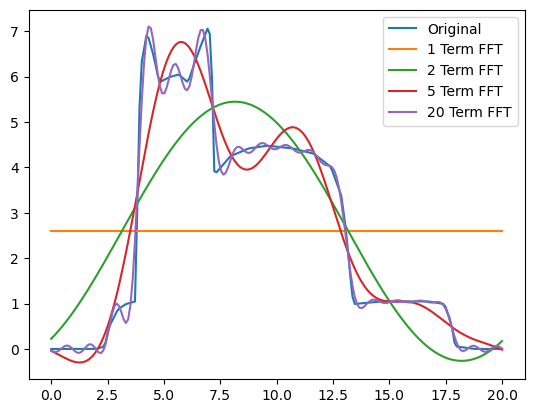

In [77]:
plt.plot(x, y, label="Original")
plt.plot(x, inv1, label="1 Term FFT")
plt.plot(x, inv2, label="2 Term FFT")
plt.plot(x, inv5, label="5 Term FFT")
plt.plot(x, inv20, label="20 Term FFT")
plt.legend()